In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# set figure size globally
plt.rcParams["figure.figsize"] = (10,13)

In [2]:
test1 = pd.read_csv('/home/iik/Desktop/tiria_waldprüfung/data/test1.csv')
test2 = pd.read_csv('/home/iik/Desktop/tiria_waldprüfung/data/test2.csv')
test3 = pd.read_csv('/home/iik/Desktop/tiria_waldprüfung/data/test3.csv')
test4 = pd.read_csv('/home/iik/Desktop/tiria_waldprüfung/data/test4.csv')

In [3]:
ergebnis_cols1 = [col for col in test1.columns if 'ergebnis' in col]
ergebnis_cols2 = [col for col in test2.columns if 'ergebnis' in col]
ergebnis_cols3 = [col for col in test3.columns if 'ergebnis' in col]
ergebnis_cols4 = [col for col in test4.columns if 'ergebnis' in col]

In [4]:
selectedData1 = test1[ergebnis_cols1]
selectedData2 = test2[ergebnis_cols2]
selectedData3 = test3[ergebnis_cols3]
selectedData4 = test4[ergebnis_cols4]

In [5]:
frequencies1 = {}
for value in selectedData1.columns:
    frequencies1[value] = selectedData1[value].value_counts()
    

frequencies2 = {}
for value in selectedData2.columns:
    frequencies2[value] = selectedData2[value].value_counts()
    
frequencies3 = {}
for value in selectedData3.columns:
    frequencies3[value] = selectedData3[value].value_counts()

frequencies4 = {}
for value in selectedData4.columns:
    frequencies4[value] = selectedData4[value].value_counts()

In [6]:
data1 = pd.DataFrame(frequencies1)
dataToPlot1=data1.transpose()

data2 = pd.DataFrame(frequencies2)
dataToPlot2=data2.transpose()

data3 = pd.DataFrame(frequencies3)
dataToPlot3=data3.transpose()

data4 = pd.DataFrame(frequencies4)
dataToPlot4=data4.transpose()

In [7]:
# Percentages
dataToPlot1_percentages = dataToPlot1.div(dataToPlot1.sum(axis=1), axis=0)*100
dataToPlot1_percentages = dataToPlot1_percentages[[1, 0, 99]]

dataToPlot2_percentages = dataToPlot2.div(dataToPlot2.sum(axis=1), axis=0)*100
dataToPlot2_percentages = dataToPlot2_percentages[[1, 0, 99]]

dataToPlot3_percentages = dataToPlot3.div(dataToPlot3.sum(axis=1), axis=0)*100
dataToPlot3_percentages = dataToPlot3_percentages[[1, 0, 99]]

dataToPlot4_percentages = dataToPlot4.div(dataToPlot4.sum(axis=1), axis=0)*100
dataToPlot4_percentages = dataToPlot4_percentages[[1, 0, 99]]

In [14]:
colors = ["g","r","b"]
legend = ['richtig','falsch','unbeantwortet']

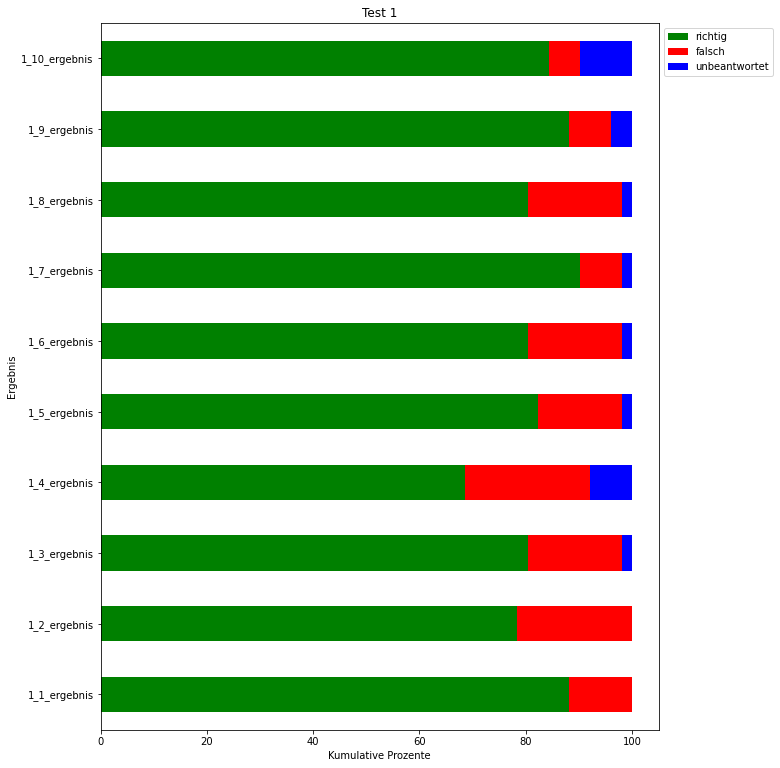

In [16]:
dataToPlot1_percentages.plot(kind='barh', stacked=True, color=colors)
plt.legend(legend, bbox_to_anchor=(1.0,1))
plt.title('Test 1')
plt.ylabel('Ergebnis')
plt.xlabel('Kumulative Prozente')
plt.show()

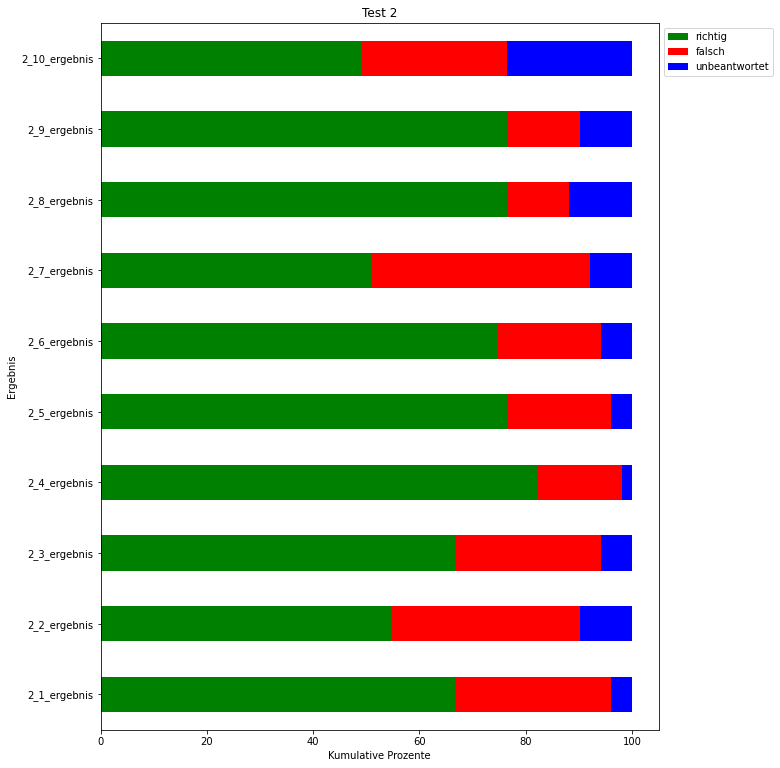

In [17]:
dataToPlot2_percentages.plot(kind='barh', stacked=True, color=colors)
plt.legend(legend, bbox_to_anchor=(1.0,1))
plt.title('Test 2')
plt.ylabel('Ergebnis')
plt.xlabel('Kumulative Prozente')
plt.show()

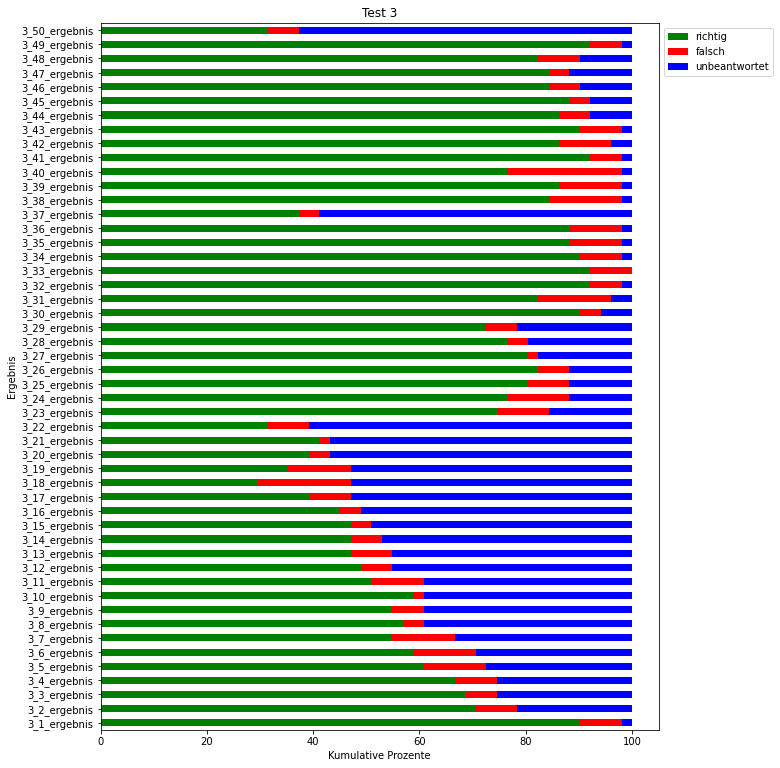

In [18]:
dataToPlot3_percentages.plot(kind='barh',stacked=True, color=colors)
plt.legend(legend,bbox_to_anchor=(1.0,1))
plt.title('Test 3')
plt.ylabel('Ergebnis')
plt.xlabel('Kumulative Prozente')
plt.show()

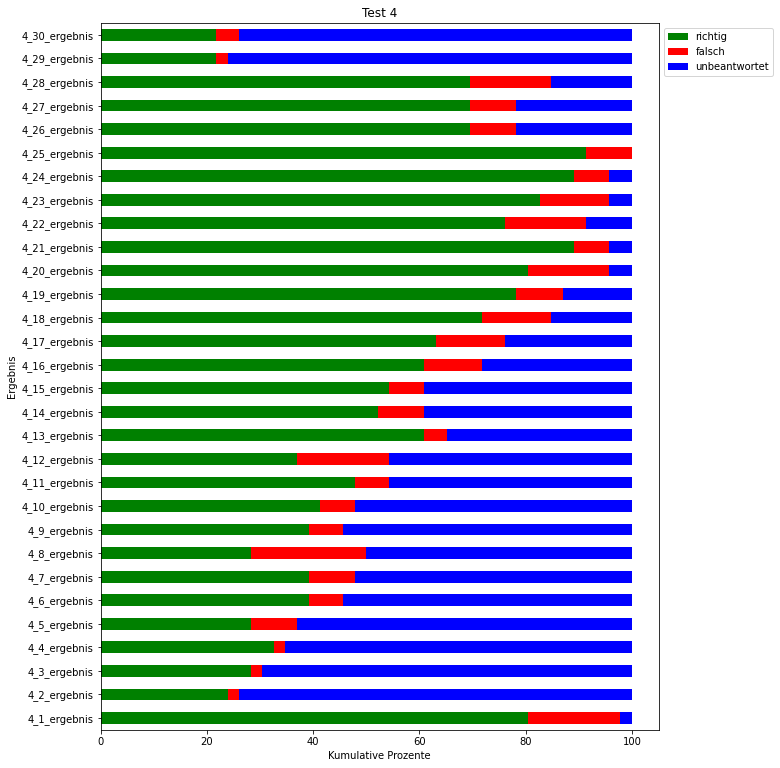

In [19]:
dataToPlot4_percentages.plot(kind='barh',stacked=True, color=colors)
plt.legend(legend,bbox_to_anchor=(1.0,1))
plt.title('Test 4')
plt.ylabel('Ergebnis')
plt.xlabel('Kumulative Prozente')
plt.show()